In [1]:
# hangul font install
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

In [1]:
!pip install konlpy > /dev/null

In [5]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving gift.txt to gift (1).txt


In [3]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving heart.jpg to heart.jpg


## Hangul text preprocessing

In [6]:
with open(textfile) as fp:
  text = fp.read()

In [7]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [10]:
# remove English, number
import re
new_tokens = []
for token in tokens:
  gift = re.sub('[A-Za-z0-9]', '', token) 
  if gift:
    new_tokens.append(gift)

In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

- 아래 두 과정 반복하여 불용어 정리

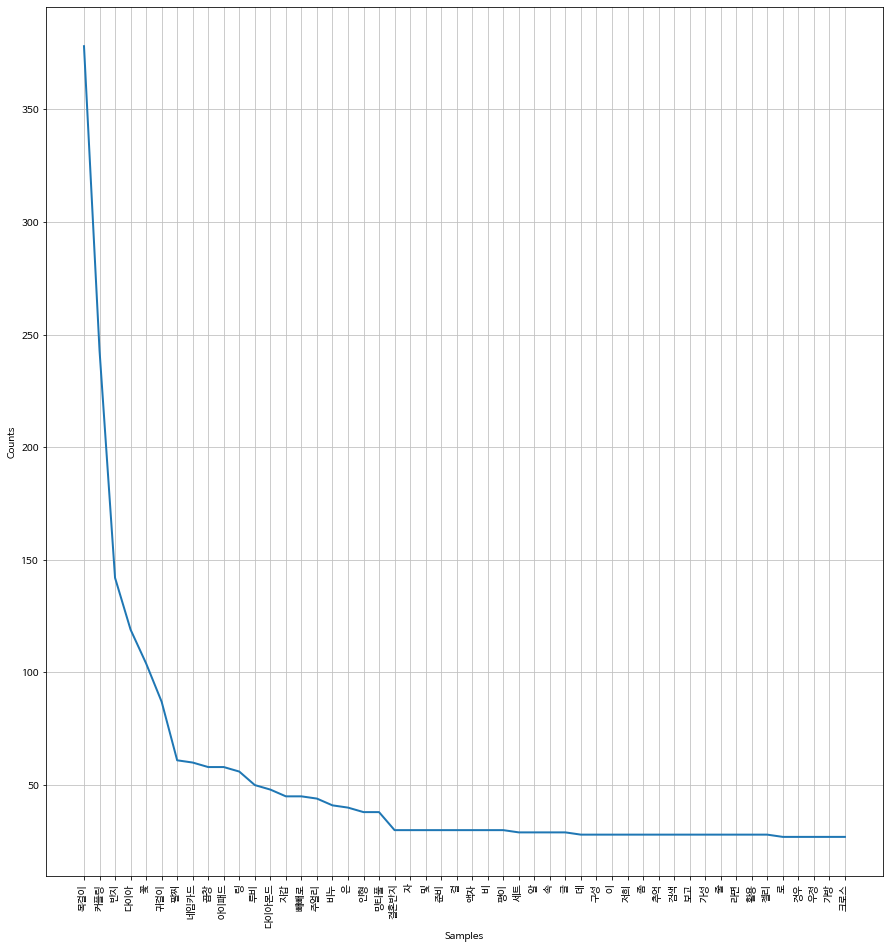

In [36]:
gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15, 16))
gift.plot(50)
plt.show()

In [35]:
stoptext = """
선물 추천 것 가격 수 가능 제품 저 제 사랑 생각 사진 여자 분 요 더 사용 구매 고급 판매 때 참고 머리 하나 해 한번 제작 용 준 디자인 거 네이버 사람 배송 중 정말 후기 티니 개 감동
하트 여친 커플 여자친구 세대 인기 상품 적절 브랜드 선택 곳 끈 모양 마감 악세사리 등 큐빅 요즘 케이스 인테리어 오늘 가지 남녀 그냥 이벤트 위 향수 페이 마음 부담 편지 연극 
직접 향 로티 남자 협찬 전 핸드 의미 변경 도움 색상 아래 포장 처 조금 하루 정도 실버 처리 보시 독서 꽃말 심플 여성 가장 때문 정보 스타일 소통 주소
소품 쇼핑 링크 이니셜 기념일 헤어 질문 친구 스토어 아주 할인 미쁜 스 이면 남 지금 고민 센스 안쪽 모빌 아이템 사이트 여 미니 나 밴드 생일 답변 체크 신지 몇개 투척 클래식 버핏
빅사 이즈 하프 공용 라인 로파 웨어 모델 날 쇼핑몰 워터 꼭 등등 크리스마스 메이드 미만 화장품 드라마 드림캐쳐 기념 유광 무광 뭐 말 스마트
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['반지', '목걸이', '가디건', '모자', '커플룩', '니트', '가디건', '가디건', '커플룩', '가디건']

## draw WordCloud

In [30]:
from wordcloud import WordCloud
from PIL import Image

In [41]:
data = gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path=path, relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

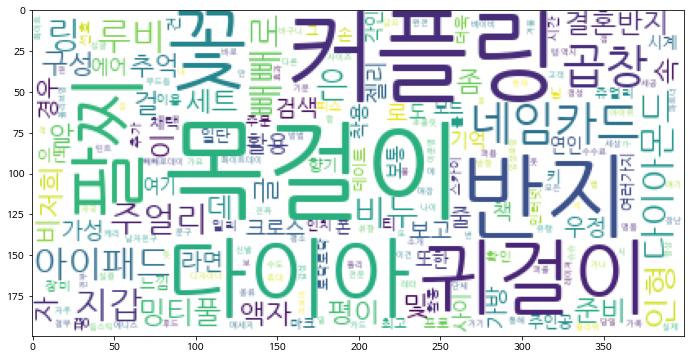

In [42]:
plt.figure(figsize=(12, 6))
plt.imshow(wc)

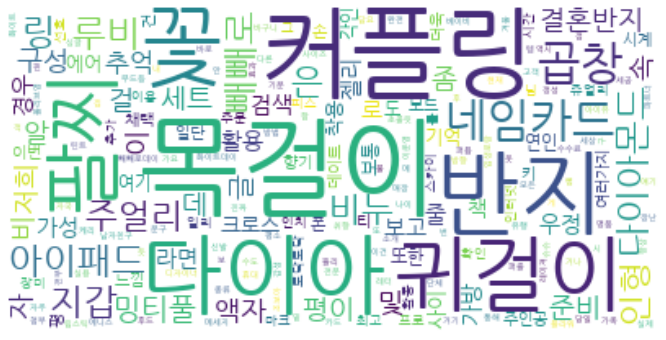

In [43]:
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- mark on the heart img

In [44]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [46]:
wc = WordCloud(
    font_path=path, relative_scaling=0.2,
    background_color='white',
    mask=mask,
    min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

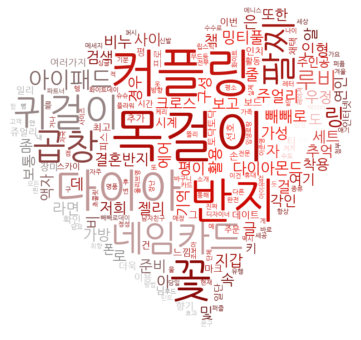

In [49]:
plt.figure(figsize=(12, 6))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()